##### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [2]:
df_flight = pd.read_csv('df_flight.csv', index_col=0)
df_flight.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-11-02,AA,AA,AA,770,AA,N906AA,770,11057,CLT,"Charlotte, NC",13303,MIA,"Miami, FL",736,730.0,-6.0,11.0,741.0,918.0,6.0,941,924.0,-17.0,0.0,NaN,0.0,N,125.0,114.0,97.0,1.0,650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-11-02,AA,AA,AA,772,AA,N521UW,772,14100,PHL,"Philadelphia, PA",12892,LAX,"Los Angeles, CA",2101,2052.0,-9.0,17.0,2109.0,2324.0,12.0,2,2336.0,-26.0,0.0,NaN,0.0,N,361.0,344.0,315.0,1.0,2402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-11-02,AA,AA,AA,774,AA,N949NN,774,11618,EWR,"Newark, NJ",13930,ORD,"Chicago, IL",713,707.0,-6.0,12.0,719.0,817.0,18.0,850,835.0,-15.0,0.0,NaN,0.0,N,157.0,148.0,118.0,1.0,719.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-11-02,AA,AA,AA,776,AA,N193UW,776,14771,SFO,"San Francisco, CA",11057,CLT,"Charlotte, NC",529,NaN,NaN,NaN,NaN,NaN,NaN,1326,NaN,NaN,1.0,A,0.0,N,297.0,NaN,NaN,1.0,2296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-11-02,AA,AA,AA,777,AA,N198UW,777,12889,LAS,"Las Vegas, NV",14107,PHX,"Phoenix, AZ",1231,1223.0,-8.0,12.0,1235.0,1322.0,7.0,1345,1329.0,-16.0,0.0,NaN,0.0,N,74.0,66.0,47.0,1.0,255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_flight.shape

(300000, 42)

In [4]:
df_flight.isna().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  638
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 2754
dep_delay                2754
taxi_out                 2855
wheels_off               2855
wheels_on                2990
taxi_in                  2990
crs_arr_time                0
arr_time                 2990
arr_delay                3352
cancelled                   0
cancellation_code      297091
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      3352
air_time                 3352
flights                     0
distance                    0
carrier_de

In [5]:
df_flight["dep_delay"] = df_flight["dep_delay"].fillna(0)
df_flight.isna().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  638
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 2754
dep_delay                   0
taxi_out                 2855
wheels_off               2855
wheels_on                2990
taxi_in                  2990
crs_arr_time                0
arr_time                 2990
arr_delay                3352
cancelled                   0
cancellation_code      297091
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      3352
air_time                 3352
flights                     0
distance                    0
carrier_de

In [6]:
#df_flight['taxi_in'].fillna((df_flight['taxi_in'].mean()), inplace=True)
df_flight.taxi_in.isna().sum()

2990

In [7]:
df_flight.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [8]:
df_flight.cancelled.nunique()

2

In [9]:
df_flight.cancelled.value_counts()
#This is a binary column where number 1 equals a canceled flight, and a 0 not canceled, 
#therefore we can drop the flights that were canceled, equivalent to 116584.

0.0    297091
1.0      2909
Name: cancelled, dtype: int64

In [10]:
# Remove cancelled flights
df_filtered = df_flight[df_flight['cancelled'] == 0]

In [11]:
df_filtered.shape

(297091, 42)

In [12]:
df_filtered.cancellation_code.nunique()

0

In [13]:
df_filtered.diverted.value_counts()

0.0    296648
1.0       443
Name: diverted, dtype: int64

In [14]:
# Remove diverted flights
df_filtered = df_filtered[df_filtered['diverted'] == 0]

In [15]:
df_filtered.shape

(296648, 42)

In [16]:
df_filtered.count()

fl_date                296648
mkt_unique_carrier     296648
branded_code_share     296648
mkt_carrier            296648
mkt_carrier_fl_num     296648
op_unique_carrier      296648
tail_num               296648
op_carrier_fl_num      296648
origin_airport_id      296648
origin                 296648
origin_city_name       296648
dest_airport_id        296648
dest                   296648
dest_city_name         296648
crs_dep_time           296648
dep_time               296648
dep_delay              296648
taxi_out               296648
wheels_off             296648
wheels_on              296648
taxi_in                296648
crs_arr_time           296648
arr_time               296648
arr_delay              296648
cancelled              296648
cancellation_code           0
diverted               296648
dup                    296648
crs_elapsed_time       296648
actual_elapsed_time    296648
air_time               296648
flights                296648
distance               296648
carrier_de

In [17]:
df_filtered = df_filtered.drop(['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', \
                               'no_name', 'cancellation_code', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime'], axis=1)

In [18]:
df_filtered.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'diverted', 'dup',
       'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance'],
      dtype='object')

In [19]:
#df_filtered = df_filtered.dropna()

In [20]:
df_filtered.shape

(296648, 32)

In [21]:
df_filtered = df_filtered.drop(['op_carrier_fl_num'], axis=1)

In [22]:
#df_filtered = df_filtered.drop(columns=['crs_dep_time', 'crs_arr_time'], inplace=True)
#df_filtered = df_filtered.drop(['crs_dep_time', 'crs_arr_time'], axis=1)

In [23]:
df_filtered.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-11-02,AA,AA,AA,770,AA,N906AA,11057,CLT,"Charlotte, NC",13303,MIA,"Miami, FL",736,730.0,-6.0,11.0,741.0,918.0,6.0,941,924.0,-17.0,0.0,0.0,N,125.0,114.0,97.0,1.0,650.0
1,2019-11-02,AA,AA,AA,772,AA,N521UW,14100,PHL,"Philadelphia, PA",12892,LAX,"Los Angeles, CA",2101,2052.0,-9.0,17.0,2109.0,2324.0,12.0,2,2336.0,-26.0,0.0,0.0,N,361.0,344.0,315.0,1.0,2402.0
2,2019-11-02,AA,AA,AA,774,AA,N949NN,11618,EWR,"Newark, NJ",13930,ORD,"Chicago, IL",713,707.0,-6.0,12.0,719.0,817.0,18.0,850,835.0,-15.0,0.0,0.0,N,157.0,148.0,118.0,1.0,719.0
4,2019-11-02,AA,AA,AA,777,AA,N198UW,12889,LAS,"Las Vegas, NV",14107,PHX,"Phoenix, AZ",1231,1223.0,-8.0,12.0,1235.0,1322.0,7.0,1345,1329.0,-16.0,0.0,0.0,N,74.0,66.0,47.0,1.0,255.0
5,2019-11-02,AA,AA,AA,777,AA,N198UW,14107,PHX,"Phoenix, AZ",12889,LAS,"Las Vegas, NV",1007,1015.0,8.0,16.0,1031.0,1114.0,7.0,1119,1121.0,2.0,0.0,0.0,N,72.0,66.0,43.0,1.0,255.0


In [24]:
df_filtered = df_filtered.dropna()

In [25]:
df_filtered.shape

(296648, 31)

In [26]:
df_filtered.isna().sum()

fl_date                0
mkt_unique_carrier     0
branded_code_share     0
mkt_carrier            0
mkt_carrier_fl_num     0
op_unique_carrier      0
tail_num               0
origin_airport_id      0
origin                 0
origin_city_name       0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
dup                    0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [27]:
df_filtered.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2019-11-02,AA,AA,AA,770,AA,N906AA,11057,CLT,"Charlotte, NC",13303,MIA,"Miami, FL",736,730.0,-6.0,11.0,741.0,918.0,6.0,941,924.0,-17.0,0.0,0.0,N,125.0,114.0,97.0,1.0,650.0
1,2019-11-02,AA,AA,AA,772,AA,N521UW,14100,PHL,"Philadelphia, PA",12892,LAX,"Los Angeles, CA",2101,2052.0,-9.0,17.0,2109.0,2324.0,12.0,2,2336.0,-26.0,0.0,0.0,N,361.0,344.0,315.0,1.0,2402.0
2,2019-11-02,AA,AA,AA,774,AA,N949NN,11618,EWR,"Newark, NJ",13930,ORD,"Chicago, IL",713,707.0,-6.0,12.0,719.0,817.0,18.0,850,835.0,-15.0,0.0,0.0,N,157.0,148.0,118.0,1.0,719.0
4,2019-11-02,AA,AA,AA,777,AA,N198UW,12889,LAS,"Las Vegas, NV",14107,PHX,"Phoenix, AZ",1231,1223.0,-8.0,12.0,1235.0,1322.0,7.0,1345,1329.0,-16.0,0.0,0.0,N,74.0,66.0,47.0,1.0,255.0
5,2019-11-02,AA,AA,AA,777,AA,N198UW,14107,PHX,"Phoenix, AZ",12889,LAS,"Las Vegas, NV",1007,1015.0,8.0,16.0,1031.0,1114.0,7.0,1119,1121.0,2.0,0.0,0.0,N,72.0,66.0,43.0,1.0,255.0


In [28]:
df_filtered['fl_date'] = pd.to_datetime(df_filtered['fl_date'])
df_filtered['weekday'] = df_filtered['fl_date'].dt.dayofweek
df_filtered.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,weekday
0,2019-11-02,AA,AA,AA,770,AA,N906AA,11057,CLT,"Charlotte, NC",13303,MIA,"Miami, FL",736,730.0,-6.0,11.0,741.0,918.0,6.0,941,924.0,-17.0,0.0,0.0,N,125.0,114.0,97.0,1.0,650.0,5
1,2019-11-02,AA,AA,AA,772,AA,N521UW,14100,PHL,"Philadelphia, PA",12892,LAX,"Los Angeles, CA",2101,2052.0,-9.0,17.0,2109.0,2324.0,12.0,2,2336.0,-26.0,0.0,0.0,N,361.0,344.0,315.0,1.0,2402.0,5
2,2019-11-02,AA,AA,AA,774,AA,N949NN,11618,EWR,"Newark, NJ",13930,ORD,"Chicago, IL",713,707.0,-6.0,12.0,719.0,817.0,18.0,850,835.0,-15.0,0.0,0.0,N,157.0,148.0,118.0,1.0,719.0,5
4,2019-11-02,AA,AA,AA,777,AA,N198UW,12889,LAS,"Las Vegas, NV",14107,PHX,"Phoenix, AZ",1231,1223.0,-8.0,12.0,1235.0,1322.0,7.0,1345,1329.0,-16.0,0.0,0.0,N,74.0,66.0,47.0,1.0,255.0,5
5,2019-11-02,AA,AA,AA,777,AA,N198UW,14107,PHX,"Phoenix, AZ",12889,LAS,"Las Vegas, NV",1007,1015.0,8.0,16.0,1031.0,1114.0,7.0,1119,1121.0,2.0,0.0,0.0,N,72.0,66.0,43.0,1.0,255.0,5


In [29]:
max(df_filtered['weekday']), min(df_filtered['weekday'])

(6, 0)

In [30]:
# Collinearity Check
df_filtered.corr()

,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,weekday
mkt_carrier_fl_num,1.000000,-0.025696,-0.028845,-0.001264,0.003833,0.026589,0.106702,0.011905,0.012451,0.011541,0.017377,0.017321,0.026996,NaN,NaN,-0.330666,-0.331005,-0.353695,NaN,-0.370261,0.064567
origin_airport_id,-0.025696,1.000000,0.017772,-0.028137,-0.029314,-0.005716,-0.027022,-0.031980,-0.001706,0.025634,-0.002410,0.000938,-0.004936,NaN,NaN,0.044554,0.045102,0.047674,NaN,0.070761,0.008859
dest_airport_id,-0.028845,0.017772,1.000000,0.029320,0.030009,0.003190,0.001702,0.030775,0.020742,-0.095028,0.019399,0.019137,-0.005748,NaN,NaN,0.087461,0.081874,0.091217,NaN,0.070937,0.005768
crs_dep_time,-0.001264,-0.028137,0.029320,1.000000,0.973209,0.046071,-0.061598,0.952280,0.677145,-0.035986,0.688909,0.646453,0.040456,NaN,NaN,-0.027607,-0.030111,-0.019220,NaN,-0.011350,0.006505
dep_time,0.003833,-0.029314,0.030009,0.973209,1.000000,0.094702,-0.054063,0.976858,0.692572,-0.034613,0.687219,0.661373,0.087720,NaN,NaN,-0.030867,-0.032815,-0.023140,NaN,-0.016379,0.000819
dep_delay,0.026589,-0.005716,0.003190,0.046071,0.094702,1.000000,0.076686,0.087789,0.028075,0.011081,0.043119,0.024002,0.965296,NaN,NaN,0.000269,0.007540,-0.003855,NaN,-0.003217,-0.060105
taxi_out,0.106702,-0.027022,0.001702,-0.061598,-0.054063,0.076686,1.000000,-0.027952,-0.024425,0.019455,-0.033207,-0.025978,0.235587,NaN,NaN,0.044783,0.155095,0.018035,NaN,0.006057,-0.063868
wheels_off,0.011905,-0.031980,0.030775,0.952280,0.976858,0.087789,-0.027952,1.000000,0.708792,-0.034029,0.695662,0.677270,0.085236,NaN,NaN,-0.038262,-0.037450,-0.031542,NaN,-0.027610,-0.000150
wheels_on,0.012451,-0.001706,0.020742,0.677145,0.692572,0.028075,-0.024425,0.708792,1.000000,-0.001027,0.879647,0.964783,0.026529,NaN,NaN,0.014453,0.014335,0.018108,NaN,0.016825,0.005358
taxi_in,0.011541,0.025634,-0.095028,-0.035986,-0.034613,0.011081,0.019455,-0.034029,-0.001027,1.000000,-0.000750,0.003310,0.091552,NaN,NaN,0.092343,0.147656,0.065305,NaN,0.054445,-0.010695


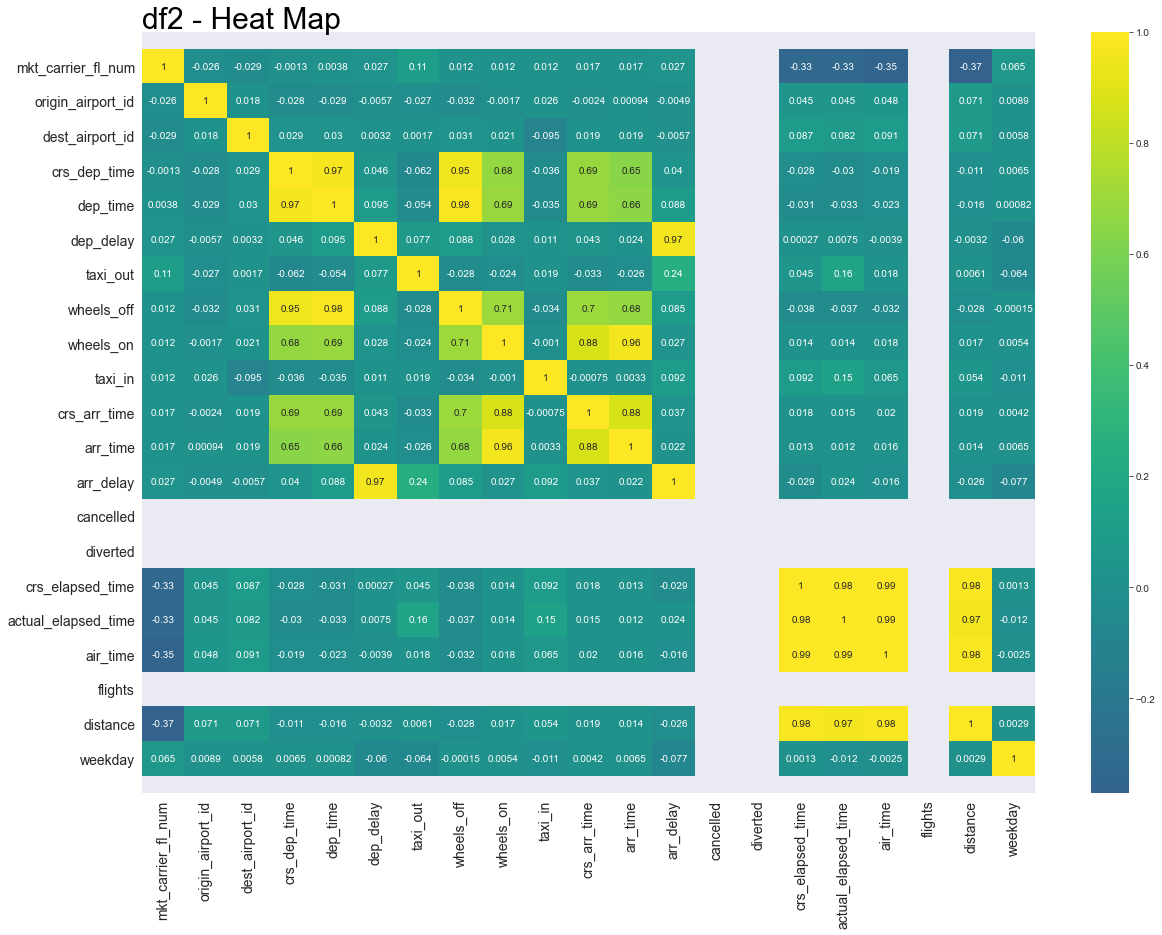

In [31]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(df_filtered.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

In [32]:
df_filtered.mkt_unique_carrier.value_counts()

AA    78610
DL    64918
UA    58441
WN    48859
AS    15320
B6    10670
NK     7369
F9     5697
HA     3384
G4     3380
Name: mkt_unique_carrier, dtype: int64

In [33]:
df_filtered.weekday.value_counts()

3    46657
6    44928
0    44881
2    44559
4    44447
1    43843
5    27333
Name: weekday, dtype: int64

In [34]:
df_filtered.origin.value_counts()

ORD    14721
ATL    14257
DFW    11574
DEN    10649
CLT     9665
       ...  
HGR        4
PPG        4
OWB        4
STC        4
ADK        3
Name: origin, Length: 364, dtype: int64

In [35]:
df_filtered[['mkt_unique_carrier']] = df_filtered[['mkt_unique_carrier']].apply(lambda col: pd.factorize(col, sort=True)[0])

In [36]:
df_filtered.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,weekday
0,2019-11-02,0,AA,AA,770,AA,N906AA,11057,CLT,"Charlotte, NC",13303,MIA,"Miami, FL",736,730.0,-6.0,11.0,741.0,918.0,6.0,941,924.0,-17.0,0.0,0.0,N,125.0,114.0,97.0,1.0,650.0,5
1,2019-11-02,0,AA,AA,772,AA,N521UW,14100,PHL,"Philadelphia, PA",12892,LAX,"Los Angeles, CA",2101,2052.0,-9.0,17.0,2109.0,2324.0,12.0,2,2336.0,-26.0,0.0,0.0,N,361.0,344.0,315.0,1.0,2402.0,5


In [37]:
df_filtered.describe()

,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,weekday
count,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.0,296648.0,296648.000000,296648.000000,296648.000000,296648.0,296648.000000,296648.000000
mean,4.214584,2724.782038,12673.373234,12669.004180,1332.244967,1336.334278,7.461389,17.285652,1361.497954,1466.973268,7.665681,1484.501618,1471.355462,1.284549,0.0,0.0,137.849411,131.672416,106.721084,1.0,759.353678,2.888787
std,3.545654,1807.789330,1525.282000,1523.789424,491.802791,500.775297,45.145213,9.474557,500.943509,526.674240,5.652363,520.601242,531.203878,47.293846,0.0,0.0,70.042401,69.740912,68.309736,0.0,573.713154,1.993022
min,0.000000,1.000000,10135.000000,10135.000000,5.000000,1.000000,-49.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-68.000000,0.0,0.0,19.000000,18.000000,8.000000,1.0,31.000000,0.000000
25%,0.000000,1159.000000,11292.000000,11292.000000,917.000000,920.000000,-6.000000,11.000000,936.000000,1049.000000,4.000000,1101.000000,1053.000000,-16.000000,0.0,0.0,88.000000,82.000000,58.000000,1.0,342.000000,1.000000
50%,3.000000,2381.000000,12889.000000,12889.000000,1325.000000,1330.000000,-3.000000,15.000000,1344.000000,1505.000000,6.000000,1515.000000,1509.000000,-8.000000,0.0,0.0,120.000000,114.000000,88.000000,1.0,602.000000,3.000000
75%,8.000000,4167.000000,14057.000000,14057.000000,1736.000000,1744.000000,3.000000,20.000000,1759.000000,1911.000000,9.000000,1919.000000,1916.000000,3.000000,0.0,0.0,166.000000,161.000000,135.000000,1.0,990.000000,4.000000
max,9.000000,9343.000000,16869.000000,16869.000000,2359.000000,2400.000000,1930.000000,188.000000,2400.000000,2400.000000,145.000000,2400.000000,2400.000000,1910.000000,0.0,0.0,690.000000,726.000000,696.000000,1.0,5095.000000,6.000000


In [38]:
df_final_filtered = df_filtered[['weekday', 'mkt_unique_carrier', 'mkt_carrier_fl_num', 'dep_delay', 'taxi_out', 'taxi_in', \
                                 'arr_delay', 'crs_elapsed_time','crs_dep_time','crs_arr_time', 'actual_elapsed_time', 'air_time', \
                                 'distance', 'origin_airport_id', 'dest_airport_id']]

In [39]:
df_final_filtered.describe()

,weekday,mkt_unique_carrier,mkt_carrier_fl_num,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,crs_dep_time,crs_arr_time,actual_elapsed_time,air_time,distance,origin_airport_id,dest_airport_id
count,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000,296648.000000
mean,2.888787,4.214584,2724.782038,7.461389,17.285652,7.665681,1.284549,137.849411,1332.244967,1484.501618,131.672416,106.721084,759.353678,12673.373234,12669.004180
std,1.993022,3.545654,1807.789330,45.145213,9.474557,5.652363,47.293846,70.042401,491.802791,520.601242,69.740912,68.309736,573.713154,1525.282000,1523.789424
min,0.000000,0.000000,1.000000,-49.000000,0.000000,0.000000,-68.000000,19.000000,5.000000,1.000000,18.000000,8.000000,31.000000,10135.000000,10135.000000
25%,1.000000,0.000000,1159.000000,-6.000000,11.000000,4.000000,-16.000000,88.000000,917.000000,1101.000000,82.000000,58.000000,342.000000,11292.000000,11292.000000
50%,3.000000,3.000000,2381.000000,-3.000000,15.000000,6.000000,-8.000000,120.000000,1325.000000,1515.000000,114.000000,88.000000,602.000000,12889.000000,12889.000000
75%,4.000000,8.000000,4167.000000,3.000000,20.000000,9.000000,3.000000,166.000000,1736.000000,1919.000000,161.000000,135.000000,990.000000,14057.000000,14057.000000
max,6.000000,9.000000,9343.000000,1930.000000,188.000000,145.000000,1910.000000,690.000000,2359.000000,2400.000000,726.000000,696.000000,5095.000000,16869.000000,16869.000000


In [40]:
df_final_filtered.to_csv('df_final_filtered.csv')

In [41]:
# df.to_csv()

In [43]:
df_final_filtered.dtypes

weekday                  int64
mkt_unique_carrier       int64
mkt_carrier_fl_num       int64
dep_delay              float64
taxi_out               float64
taxi_in                float64
arr_delay              float64
crs_elapsed_time       float64
crs_dep_time             int64
crs_arr_time             int64
actual_elapsed_time    float64
air_time               float64
distance               float64
origin_airport_id        int64
dest_airport_id          int64
dtype: object